In [71]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [72]:
from imblearn.over_sampling import BorderlineSMOTE

### Read Source Data

In [73]:
patients = pd.read_csv('healthcare-dataset-stroke-data-preprocessed.csv')
patients.head(10)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.816895,0.0,1.0,1.0,0.801265,0.301260,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,1.0,0.679023,0.219549,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,1.0,0.234512,0.254296,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.597168,0.0,0.0,1.0,0.536008,0.276060,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.963379,1.0,0.0,1.0,0.549349,0.156930,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.987793,0.0,0.0,1.0,0.605161,0.214204,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.902344,1.0,1.0,1.0,0.069107,0.195876,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.841309,0.0,0.0,0.0,0.181285,0.143184,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.719238,0.0,0.0,1.0,0.097082,0.197404,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.951172,0.0,0.0,1.0,0.015927,0.159221,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Data Augmentation (BorderlineSMOTE)

In [92]:
smote = BorderlineSMOTE(random_state=214, k_neighbors=5)
X_balance, y_balance = adasyn.fit_resample(X, y)

In [93]:
from collections import Counter
Counter(y_balance)

Counter({1.0: 4859, 0.0: 4861})

In [87]:
balanced_patients = pd.DataFrame(X_balance, columns=patients.columns)
balanced_patients["stroke"] = y_balance
print(balanced_patients.shape)
balanced_patients.head()

(9720, 15)


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.816895,0.0,1.0,1.0,0.801265,0.301260,0.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,1.0,0.679023,0.219549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,1.0,0.234512,0.254296,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.597168,0.0,0.0,1.0,0.536008,0.276060,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.963379,1.0,0.0,1.0,0.549349,0.156930,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
stroke_patients = patients[patients.stroke == 1]
stroke_balanced_patients = balanced_patients[balanced_patients.stroke == 1]
print(len(stroke_patients), len(stroke_balanced_patients))

249 4859


In [89]:
data = [stroke_patients.mean(), stroke_balanced_patients.mean(), stroke_patients.var(), stroke_balanced_patients.var()]
diff = pd.DataFrame(data, columns=patients.columns)
diff.insert(loc=0, column='Note', value=["original_mean", "augmentation_mean", "original_variance", "augmentation_variance"])
diff

,Note,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,original_mean,0.825784,0.265060,0.188755,0.883534,0.357422,0.230793,0.379518,1.0,0.433735,0.542169,0.132530,0.0,0.598394,0.261044,0.008032
1,augmentation_mean,0.681655,0.203526,0.342058,0.566825,0.284956,0.217441,0.281500,1.0,0.359226,0.641237,0.481169,0.0,0.220416,0.108253,0.190163
2,original_variance,0.024138,0.195589,0.153744,0.103316,0.081711,0.004756,0.131707,0.0,0.246599,0.249223,0.115429,0.0,0.241288,0.193678,0.008000
3,augmentation_variance,0.090229,0.130724,0.208844,0.229467,0.068458,0.001441,0.083979,0.0,0.182051,0.182299,0.249697,0.0,0.171868,0.096554,0.154032


In [81]:
diff.to_csv('diff_augmentation_balance(BorderlineSMOTE).csv', float_format='%.4f', index=False)

In [82]:
balanced_patients.to_csv('data-preprocessed-augmentation(BorderlineSMOTE).csv', index=False)

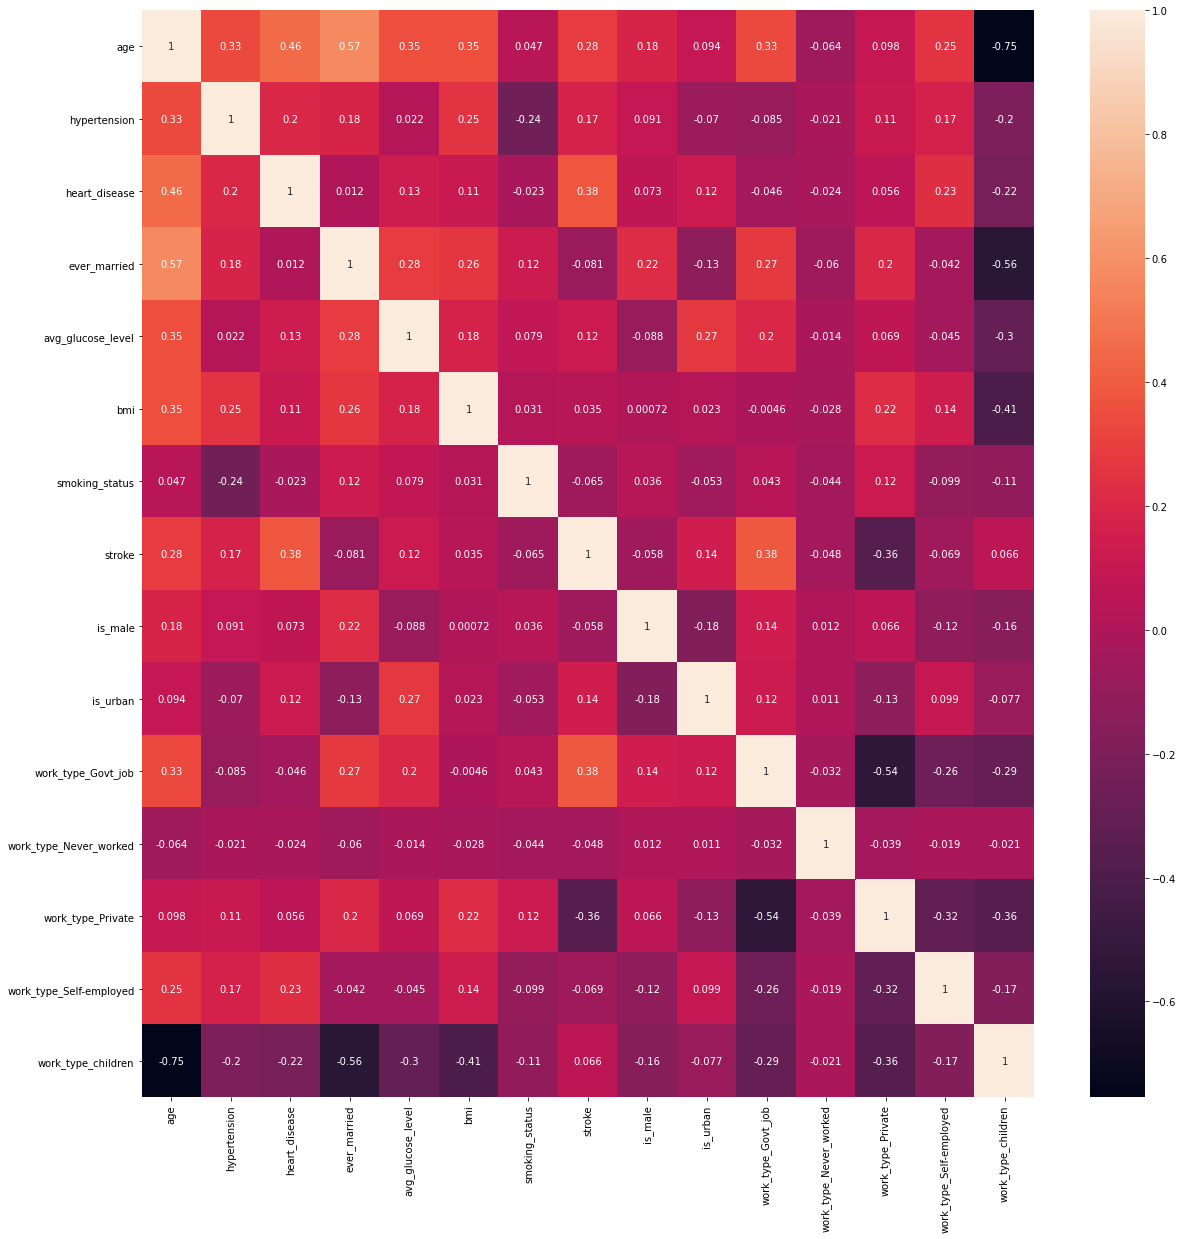

In [83]:
plt.figure(figsize=[20, 20])
hm = sb.heatmap(balanced_patients.corr(), annot=True)

In [84]:
figure = hm.get_figure()    
figure.savefig('conf-balanced(BorderlineSMOTE).png', dpi=300)